# Exploratory Data Analysis On Superstore Dataset 

# Importing Required Libaries :

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

# Loading Dataset

In [4]:
data = pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
print(data.shape)

(9994, 13)


# Description of Dataset

In [6]:
data.describe(include="all")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


# Checking for null values

In [7]:
print(data.isna().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [8]:
data.drop_duplicates(keep = "first",inplace = True)

In [9]:
print(data.corr())

             Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023476  0.013110  0.059225 -0.029892
Sales          -0.023476  1.000000  0.200722 -0.028311  0.479067
Quantity        0.013110  0.200722  1.000000  0.008678  0.066211
Discount        0.059225 -0.028311  0.008678  1.000000 -0.219662
Profit         -0.029892  0.479067  0.066211 -0.219662  1.000000


In [10]:
data.groupby('Ship Mode').mean()

,Postal Code,Sales,Quantity,Discount,Profit
Ship Mode,,,,,
First Class,54751.119063,228.614490,3.702017,0.164587,31.850134
Same Day,57468.581181,236.755950,3.608856,0.152675,29.283924
Second Class,55601.554297,236.323750,3.817808,0.138626,29.565956
Standard Class,54902.907809,227.928858,3.821327,0.160222,27.534715


In [11]:
data.groupby('Segment').mean()

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,55618.297125,223.969279,3.761721,0.158308,25.855188
Corporate,54430.615589,234.185781,3.844444,0.158159,30.499164
Home Office,55032.679595,241.311234,3.784148,0.147178,33.883643


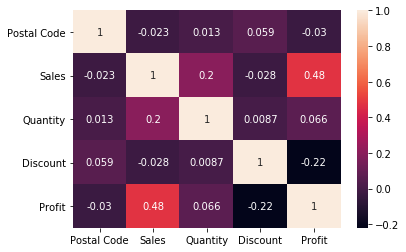

In [12]:
corr = data.corr()
sns.heatmap(corr,annot=True)

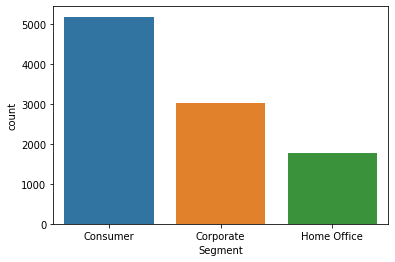

In [13]:
sns.countplot(data['Segment'])
plt.show()

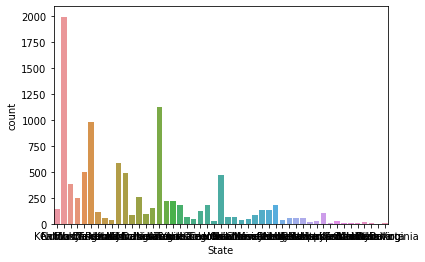

In [21]:
sns.countplot(data['State'])
plt.show()

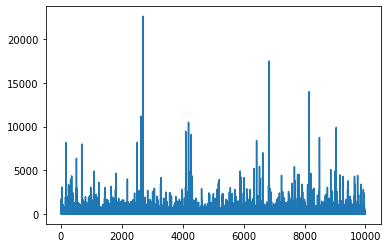

In [39]:
plt.plot(data['Sales'])
plt.show()

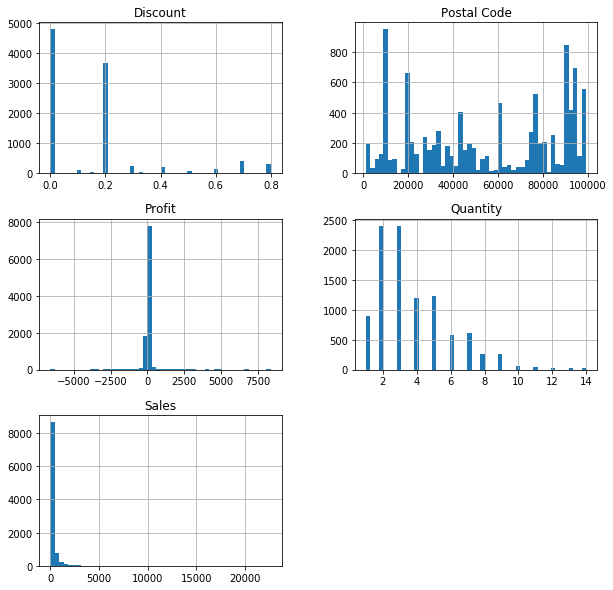

In [33]:
data.hist(figsize=(10,10),bins=50)
plt.show()

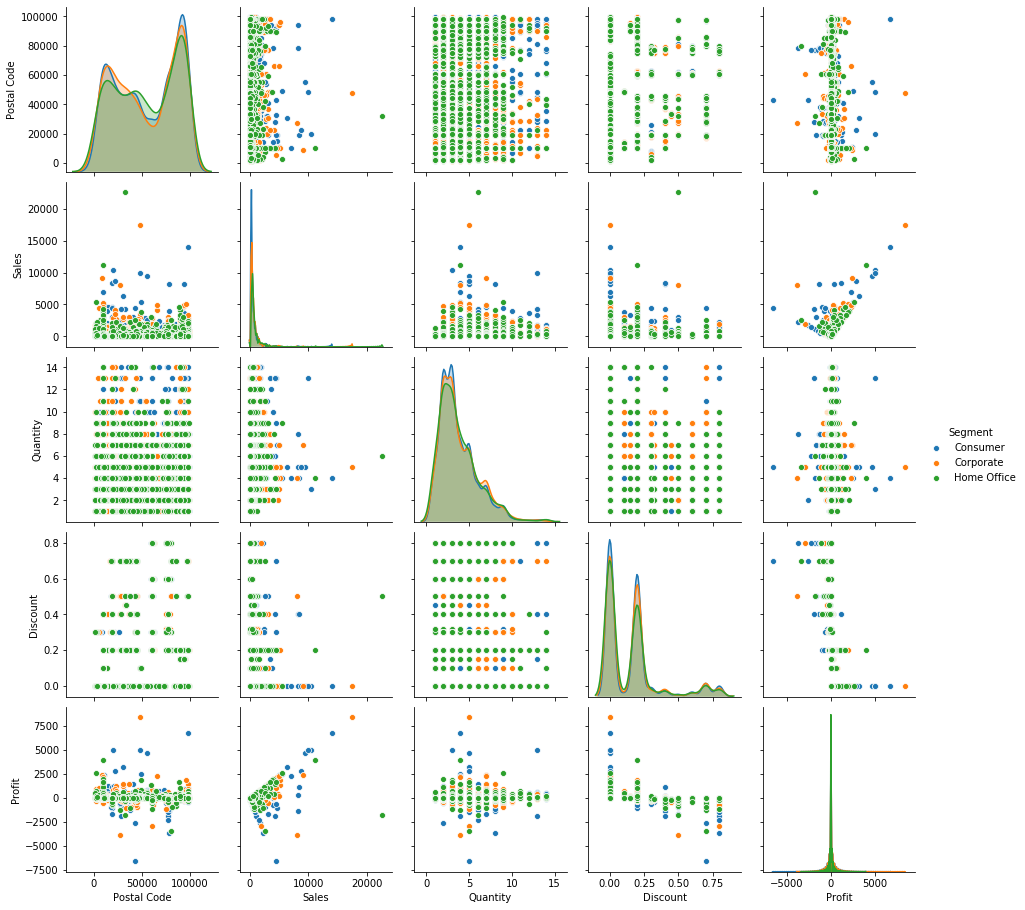

In [15]:
sns.pairplot(data,hue='Segment');

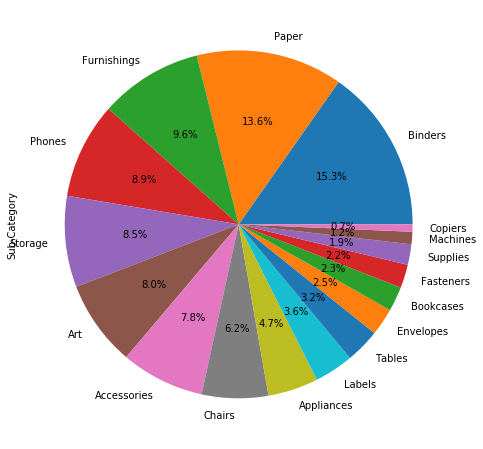

In [16]:
plt.figure(figsize=(10,8))
data['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

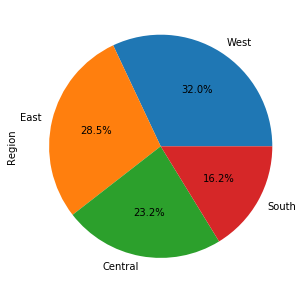

In [29]:
plt.figure(figsize=(5,8))
data['Region'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [57]:
data1 = data[['City','Category', 'State','Sales','Profit']]
# pandas pivot with multiple variables
heatmap1_data = pd.pivot_table(data1,values='Sales', index=["City"], columns='Category')

# Heatmap of sales in every city by category

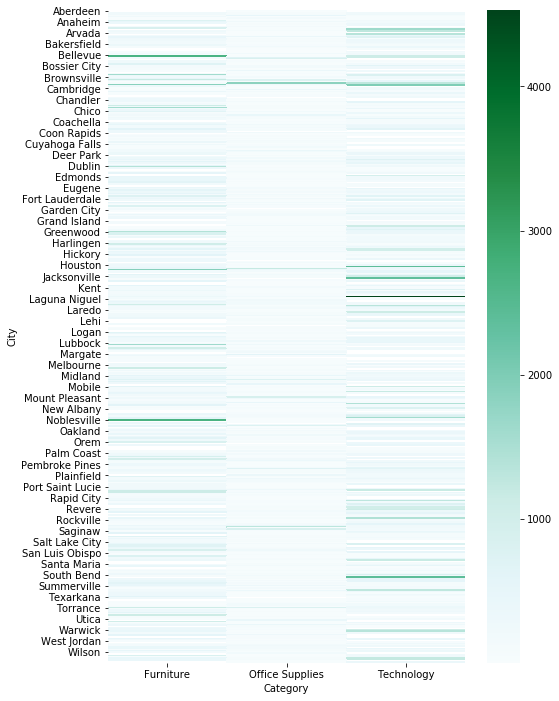

In [60]:
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap1_data, cmap="BuGn")

# Heatmap of sales in every State by category

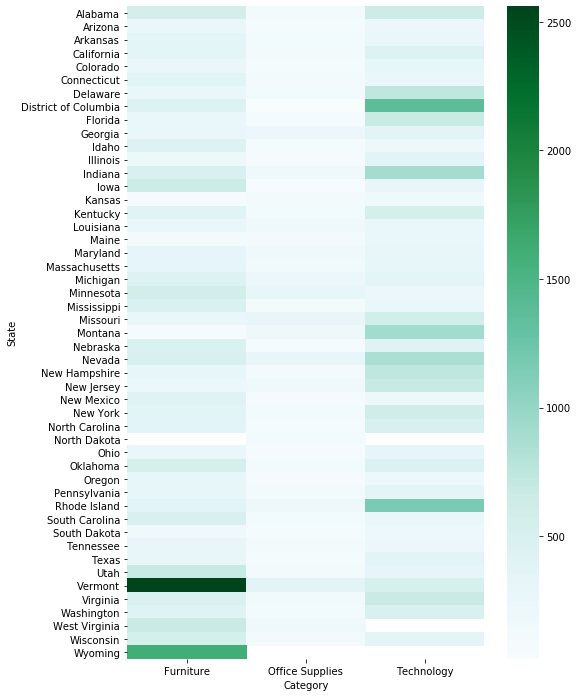

In [61]:
heatmap2_data = pd.pivot_table(data1,values='Sales', index=["State"], columns='Category')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap2_data, cmap="BuGn")

# Heat map of profits in every state by category

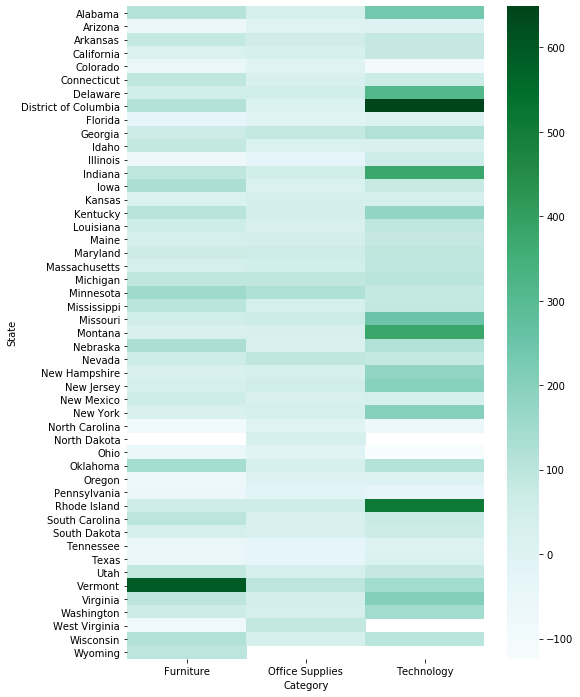

In [62]:
heatmap3_data = pd.pivot_table(data1,values='Profit', index=["State"], columns='Category')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap3_data, cmap="BuGn")

# Heatmap of profit in every city by category

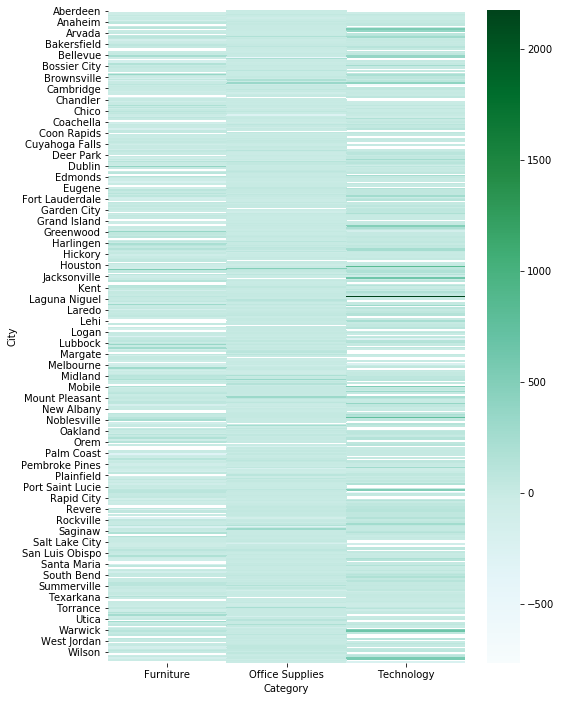

In [63]:
heatmap4_data = pd.pivot_table(data1,values='Profit', index=["City"], columns='Category')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap4_data, cmap="BuGn")

# Heatmap of profit in every city by segment

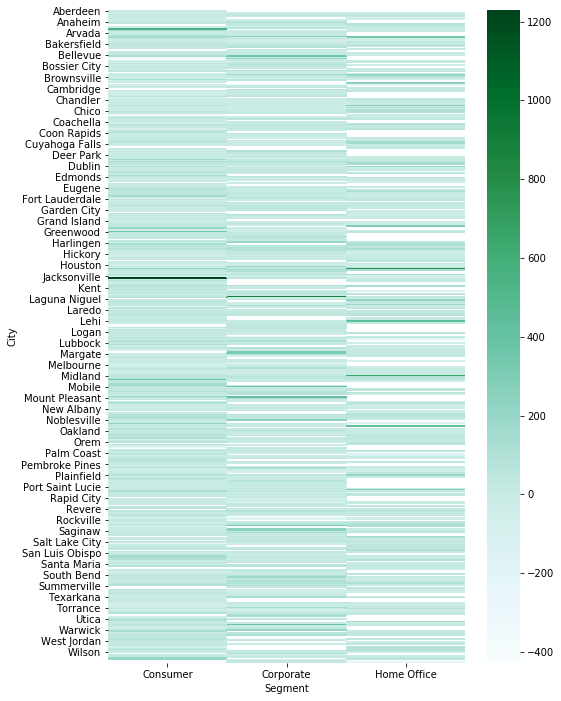

In [64]:
heatmap5_data = pd.pivot_table(data,values='Profit', index=["City"], columns='Segment')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap5_data, cmap="BuGn")

# Heatmap of profits in every state by segment

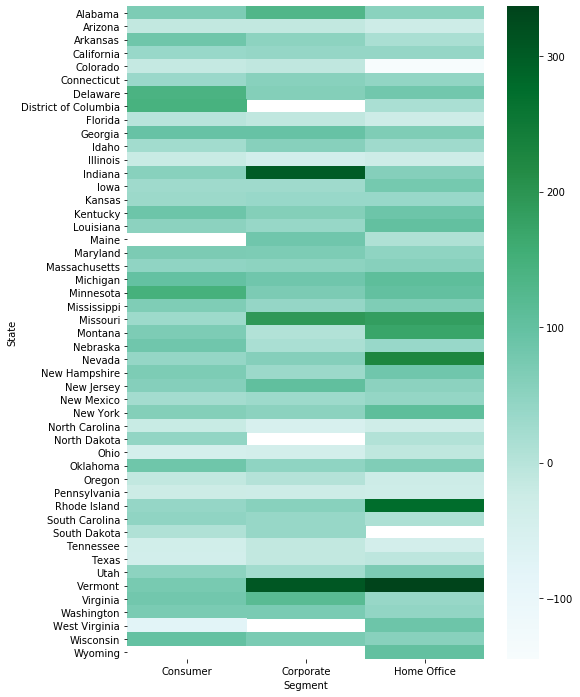

In [65]:
heatmap6_data = pd.pivot_table(data,values='Profit', index=["State"], columns='Segment')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap6_data, cmap="BuGn")

# Heatmap of sales in every city by sub-category

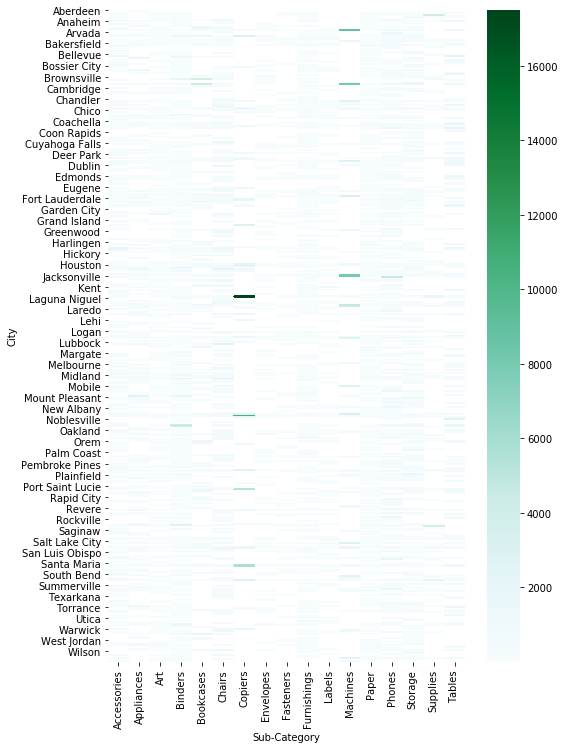

In [66]:
heatmap7_data = pd.pivot_table(data,values='Sales', index=["City"], columns='Sub-Category')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap9_data, cmap="BuGn")

# Heatmap of profit in every city by sub-category

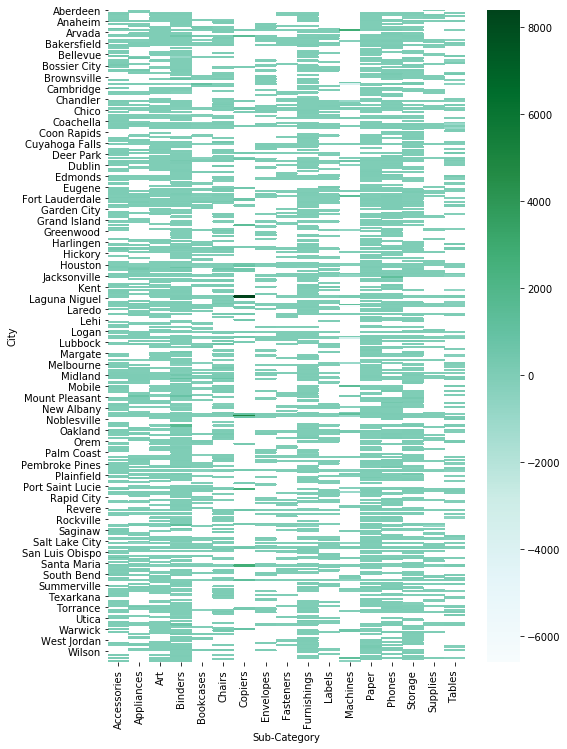

In [67]:
heatmap8_data = pd.pivot_table(data,values='Profit', index=["City"], columns='Sub-Category')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap12_data, cmap="BuGn")

<Figure size 792x792 with 0 Axes>

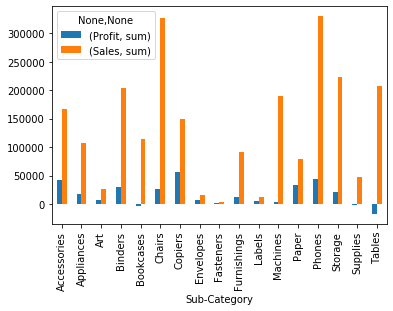

In [71]:
plt.figure(figsize=(11,11))
data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

In [ ]:
#This project was completely made by me, Amber Kakkar under GRIP Program 2020